# Programming task 2
## $\underline{\text{Atmospheric pressure and temperature variations}}$
Trym Varland

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

plt.style.use('ggplot')

""" Constants """
k_B = 1.38064852e-23 # Boltzmann constant (J/K)
R_E = 6_371e6 # Radius of Earth (m)
g_0 = 9.80665 # Gravitational acceleration at sea level (m/s2)
P_0 = 101_325 # Pressure at sea level (Pa)
# Atmoic mass of O, N2, O2 (kg)
m_O = 15.9994e-3
m_N2 = 28.0134e-3
m_O2 = 31.9988e-3

""" Reading the data from the file MSIS.dat """
height, O, N2, O2, mass_density, temperature_neutral = np.loadtxt('MSIS.dat', skiprows=18, unpack=True)

## Task 1


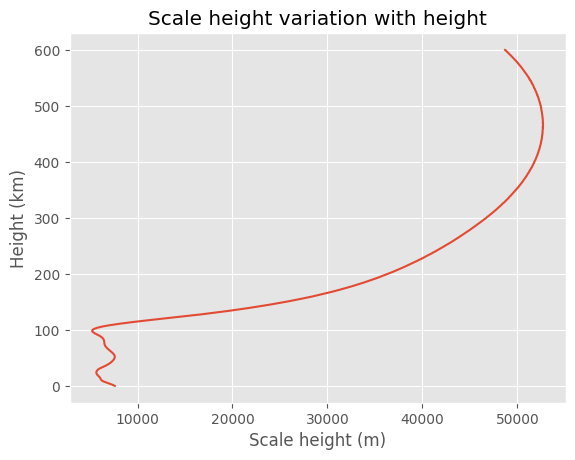

In [2]:
# total number density (cm-3) convert to m-3
number_density = (O + N2 + O2)*1e6
# mass density (kg/m3)
mass_density = mass_density * 1e3
# calculating the average mass
ave_mass = mass_density / number_density

# Gravitational accereleration which varies with height.
def gravitational_acceleration(height):
    g = g_0 *(R_E**2 / (R_E + height)**2)
    return g

# Atmosphere-alt-vars.pdf page 5, for the scale height (H) equation.
def scale_height(temperature, ave_mass):
    return k_B * temperature / (ave_mass * gravitational_acceleration(height))

plt.plot(scale_height(temperature_neutral, ave_mass), height)
plt.xlabel('Scale height (m)')
plt.ylabel('Height (km)')
plt.title('Scale height variation with height')
plt.show()      

**Description:**\
We start by calculating the average molecular mass ($\overline{m}$), which we derive from the mass density and number density. Making a function for the gravitational acceleration, since it varies with height. Than we can calulate the scale height as a function of height. Which gives the following plot above, for the altitude variation of the atmospheric scale-height.

## Task 2

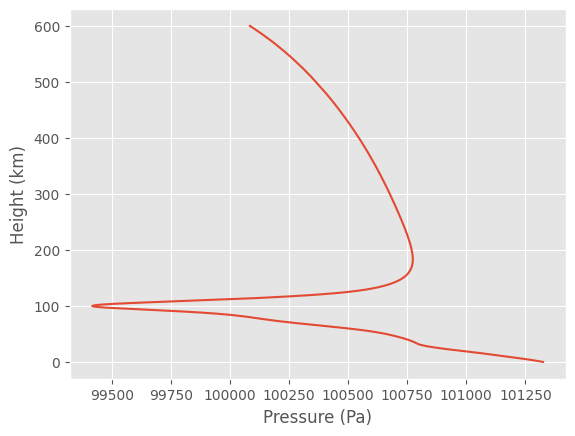

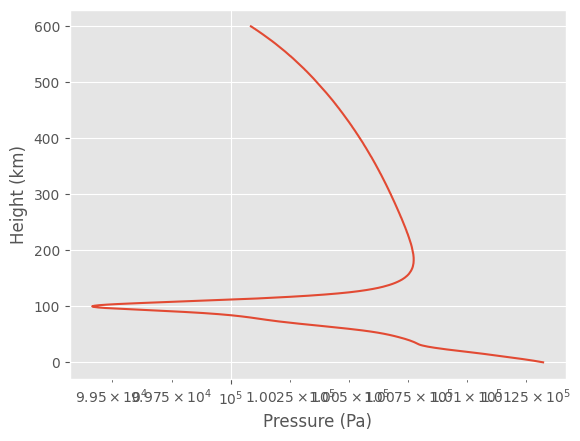

In [3]:
# Using the barometric equation, to calculate the pressure variation with height.
def pressure_variation(height, pressure_0):
    pressure = pressure_0 * np.exp(-height / scale_height(temperature_neutral, ave_mass))
    return pressure


plt.plot(pressure_variation(height, P_0), height)
plt.xlabel("Pressure (Pa)")
plt.ylabel("Height (km)")
plt.show()
plt.plot(pressure_variation(height, P_0), height)
plt.xscale('log')
plt.xlabel("Pressure (Pa)")
plt.ylabel("Height (km)")
plt.show()


**Description:**\
Using the pressure variation equation, from Atmosphere-alt-vars.pdf:
$$ p(z) = p(0)e^{-z/H}$$
Here $p(0)$ is the pressure at sea level, $z$ is the height and $H$ is the scale height.\
Plot at the top have a x-axis defined with a linear scale, and the plot down under have logarithmic scale. As we can clearly see, it does not depend on the scaling of the x-axis.

## Task 3

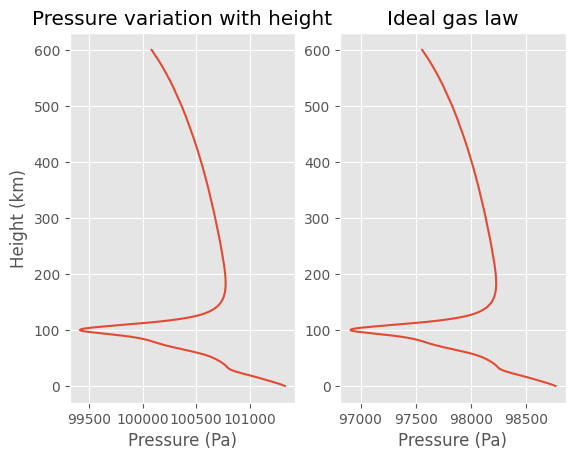

In [4]:
# Density variation with height
def density(height):
    density = number_density[0]* (temperature_neutral[0]/temperature_neutral) * np.exp(-height/scale_height(temperature_neutral, ave_mass))
    return density
    
def ideal_gaslaw(height):
    ideal_gas_law = density(height) * k_B * temperature_neutral
    return ideal_gas_law

plt.subplot(1,2,1)
plt.plot(pressure_variation(height, P_0), height)
plt.xlabel('Pressure (Pa)')
plt.ylabel('Height (km)')
plt.title('Pressure variation with height')

plt.subplot(1,2,2)
plt.plot(ideal_gaslaw(height), height)
plt.xlabel('Pressure (Pa)')
plt.title('Ideal gas law')

plt.show()

**Description:**\
To be available to compare our pressure-profile with the ideal gas-law, we need to first calculate the density variation and forward use that in the ideal gas-law. The density variation is given by: 
$$ n(z) = n(z_0)\Big[\frac{T(z_0)}{T(z)}\Big]e^{-z/H}$$
Here $z_0$ describes the height at sea level, and $H$ is scale height. As we can see the the plot's is, pretty much the same.

## Task 4

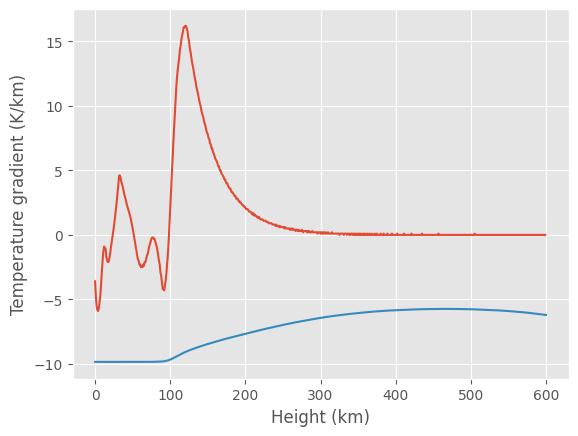

In [5]:
def temperature_vs_adiabatic():
    dT = np.diff(temperature_neutral) # Temperature difference
    dz = np.diff(height) # Height difference
    
    dTdz = dT/dz # Temperature gradient
    
    abc_lapsrate = -(((1.4-1)/(1.4)) * ((ave_mass *g_0)/k_B))*1e3 # Adiabatic lapse rate, with coneversion to K/km
    
    plt.plot(height[:-1], dTdz)
    plt.plot(height, abc_lapsrate)
    plt.xlabel('Height (km)')
    plt.ylabel('Temperature gradient (K/km)')
    plt.show()
    
temperature_vs_adiabatic()

**Description:**\
We start by calculating the temperature-gradient by deviding the temperature- and height-difference, than calculating the adiabtic lapse-rate which is defined as:
$$\alpha^* = -\frac{\gamma-1}{\gamma}\frac{\overline{m}g}{k} $$  
Here $\gamma$ is the adiabtic constant. We can see from the the plot, that we have some significantly instability, befor we approce about a height at 230km and it get's more stable.